In [68]:
from bioinfokit.analys import stat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)
OUTDATED_IGNORE=1

In [3]:
data_frame = pd.read_csv('./exams.csv')
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Przedmiotem analizy będzie zbiór danych zawierający wyniki z testów uzyskanych przez uczniów z różnych przedmiotów. Zbiór został pobrany ze strony kaggle.com i jest dostępny pod linkiem: https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams

Dane w zbiorze zostały podzielone na 8 kolumn, każda z nich zawiera 1000 wpisów:
1. gender - inrofmacja o płci male/female, dane jakościowe
2. race_ethnicity - informacja o rasie zakodowana jako grupy A-E, dane jakościowe
3. parental_education - poziom wykształcenia rodziców, dane jakościowe
3. lunch - infomracja o lunchu, dane jakościowe
3. test_preparation_course - informacja o tym, czy został zrobiony kurs przygotowania do testu, dane jakościowe
4. math_score - wynik z egzaminu z matematyki, dane ilościowe
4. reading_score - wynik egzaminu z czytania, dane ilościowe
3. writing_score - wynik egzaminu z pisania, dane ilościowe

In [4]:
data_frame.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [5]:
data_frame.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
data_frame=data_frame.rename(columns={"race/ethnicity":"race_ethnicity","parental level of education":"parental_education",
                                      "test preparation course":"test_preparation_course","math score":"math_score",
                                      "reading score":"reading_score","writing score":"writing_score"})
data_frame.head(10)

,gender,race_ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [7]:
data_frame.to_csv('math.csv')

Zbiór danych nie zawiera brakujących obserwacji.

### Płeć uczniów

In [8]:
data_frame['gender'].describe()

count     1000
unique       2
top       male
freq       517
Name: gender, dtype: object

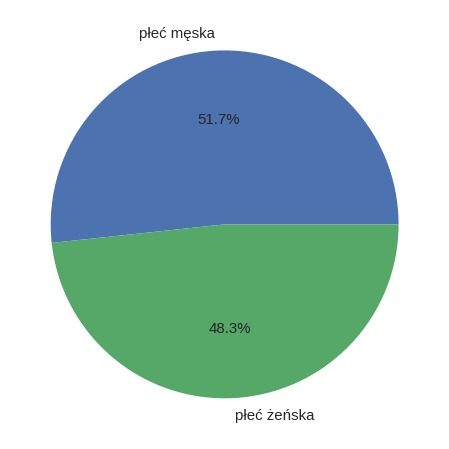

In [9]:
gender = data_frame['gender'].value_counts()
plt.pie(gender, labels=['płeć męska', 'płeć żeńska'], autopct='%1.1f%%', textprops={'fontsize': 15})
plt.show()

In [10]:
gender

male      517
female    483
Name: gender, dtype: int64

Dane w kolumnie gender ifnormują nas o płci ucznia. W zbiorze 517 rekordów dotyczy uczniów płci męskiej, a 483 żeńskiej.

### Pochodzenie etniczne

Jedną z informacji o uczniach jest ich rasa/pochodzenie etniczne. W zbiorze ta informacje zostały zakodowane za pomocą oznaczenia grupy do jakiej uczeń przynależy. Wyróżniono 5 grup.

In [12]:
ethnicity = data_frame['race_ethnicity'].value_counts()
ethnicity = ethnicity.reset_index()

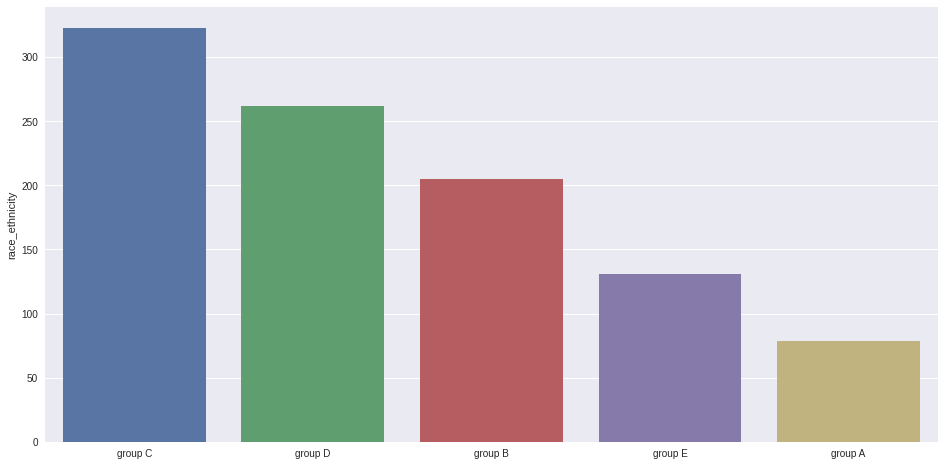

In [14]:
sns.barplot(data=ethnicity, x='index', y='race_ethnicity')
plt.xlabel(None)
plt.show()

In [15]:
ethnicity

,index,race_ethnicity
0,group C,323
1,group D,262
2,group B,205
3,group E,131
4,group A,79


Najbardziej liczna grupa to Grupa C - przynalezy do niej 323 uczniów. Kolejno są to grupy D (262 uczniów), C (205 uczniów), B (131 ucznów). Najmniej liczną grupą jest groupa A - należy do niej tylko 79 uczniów.

### Poziom wykształcenia rodziców
Kolumna parental_education zawiera informację o poziomie wykształcenia rodziców uczniów.

In [16]:
parents_education = data_frame['parental_education'].value_counts()
parents_education = parents_education.reset_index()

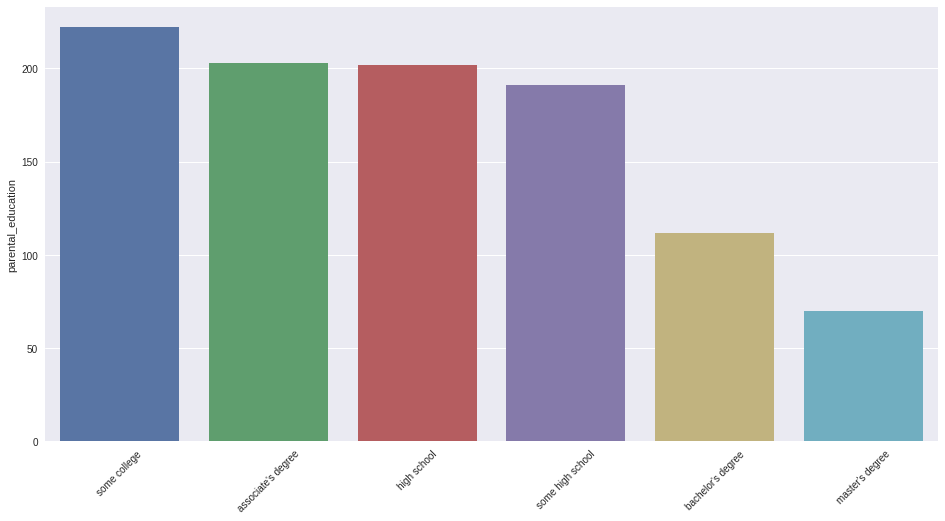

In [17]:
sns.barplot(data=parents_education, x='index', y='parental_education')
plt.xticks(rotation=45)
plt.xlabel(None)
plt.show()

In [18]:
parents_education

,index,parental_education
0,some college,222
1,associate's degree,203
2,high school,202
3,some high school,191
4,bachelor's degree,112
5,master's degree,70


Najczęstsze wykształcenie rodziców to "some college" (odczytuję to jako nieukończone studia) - 222. Prawie identyczne wyniki mają wykształecnia "associate's degree" (tytuł uzyskiwany pomiędzy szkołą średnią a przed licencjatem) i "high school" (ukończona szkoła średnia) - odpowiednio 203 i 202 obserwacje. Najrzadziej występującym poziomem wykształecenia były "bachelor's degree" (licencjat)- 112 obserwacji i master's degree (magister) 70 obserwacji.

### Lunch
Kolumna "lunch" zawiera informację o tym, czy lunch był opłacany standardowo (standard), czy był on darmowy lub dofinansowany (free/reduced).

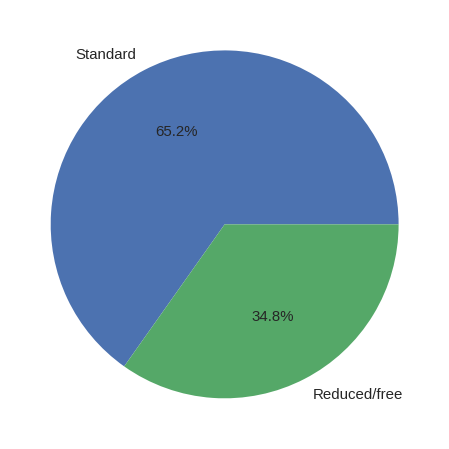

In [19]:
lunch = data_frame['lunch'].value_counts()
plt.pie(lunch, labels=['Standard', 'Reduced/free'], autopct='%1.1f%%', textprops={'fontsize': 15})
plt.show()

In [20]:
lunch

standard        652
free/reduced    348
Name: lunch, dtype: int64

652 uczniów korzystało z lunchu ze standardową opłatą. Dla 348 uczniów lunch był dofinansowany lub całkowicie darmowy. Jest to odpowiednio 65,2% i 34,8%.

### Kurs przygotowujący do testu
Część uczniów odbyła kurs przygotowujący do testu. Informację o tym, czy uczeń ukończył taki kurs czy nie, zawiera kolumna 'test_preparation_course'.

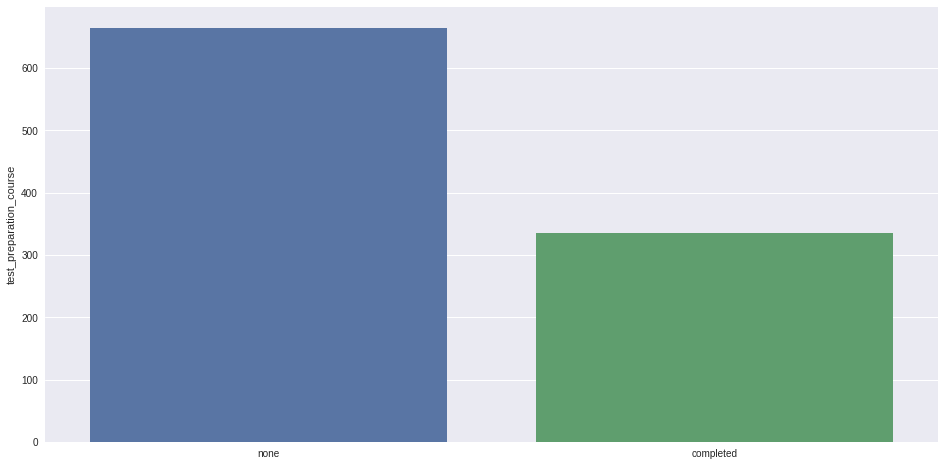

In [21]:
preparation = data_frame['test_preparation_course'].value_counts()
preparation = preparation.reset_index()
sns.barplot(data=preparation, x='index', y='test_preparation_course')
plt.xlabel(None)
plt.show()

In [22]:
preparation

,index,test_preparation_course
0,none,665
1,completed,335


Większość uczniów (665) nie ukończyła kursu przygotowującego do testu, za to kurs ukończyło 335 uczniów.

### Ilość punktów z testu z matematyki

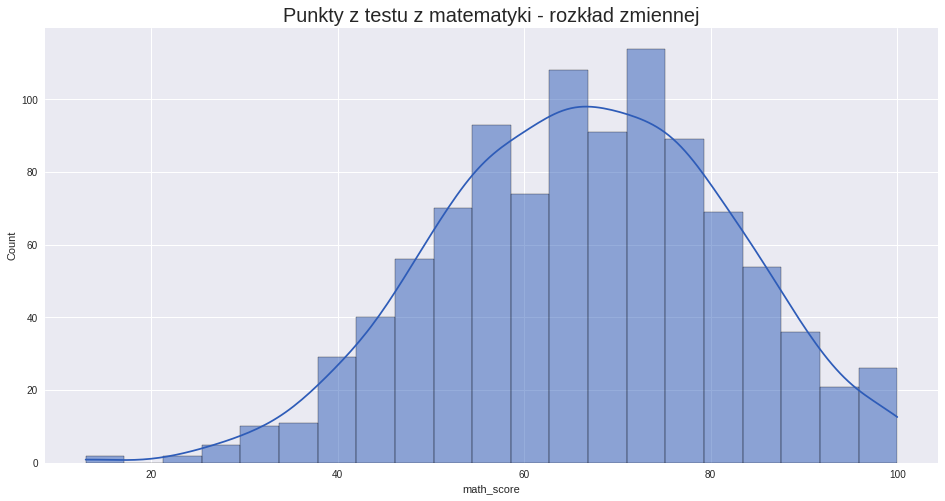

In [23]:
sns.histplot(x='math_score',data=data_frame, kde=True, color='#2e5cb8')
plt.title('Punkty z testu z matematyki - rozkład zmiennej', size=20)
plt.show()

In [24]:
data_frame['math_score'].describe()

count    1000.000000
mean       66.396000
std        15.402871
min        13.000000
25%        56.000000
50%        66.500000
75%        77.000000
max       100.000000
Name: math_score, dtype: float64

Rozkład wyników z testu z matematyki jest zbliżony do rozkładu normalnego. Średnia liczba punktów ok.66,4 bardzo bliska jest też mediana - 66,5. Najniższy wynik to 13 punktów a najwyższy 100. Najczęściej wyniki występowały w przedziale 60-80 punktów.

### Ilość punktów z testu z czytania

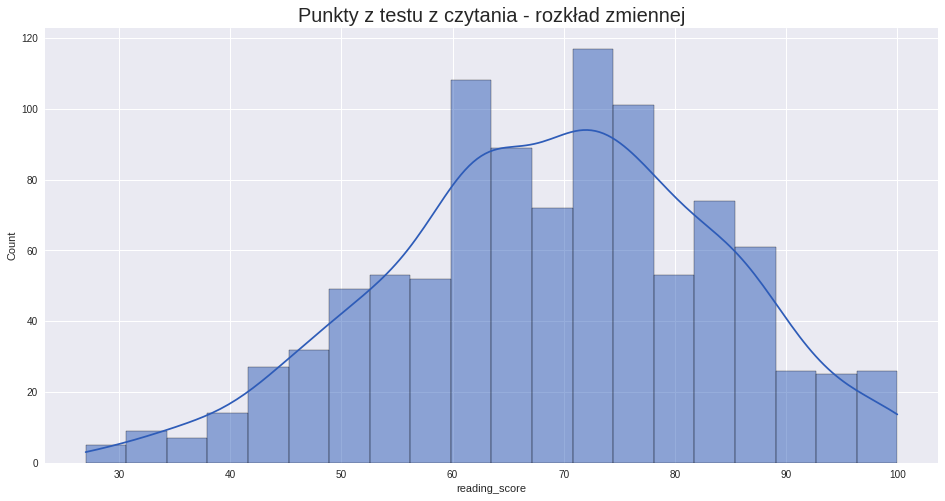

In [25]:
sns.histplot(x='reading_score',data=data_frame, kde=True, color='#2e5cb8')
plt.title('Punkty z testu z czytania - rozkład zmiennej', size=20)
plt.show()

In [26]:
data_frame['reading_score'].describe()

count    1000.000000
mean       69.002000
std        14.737272
min        27.000000
25%        60.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading_score, dtype: float64

Wyniki testu z czytania także wyglądają na zbliżone do rozkładu normalnego, jednak wydają się być bardziej zróżnicowane. Średnia ilość punktów jest wyższa niż ta z matamatyki i wynosi 69 punktów. Mediana to 70 punktów. Najniższa wartość to 27 punktów a najwyższa to 100.

### Ilość punktów z testu z pisania

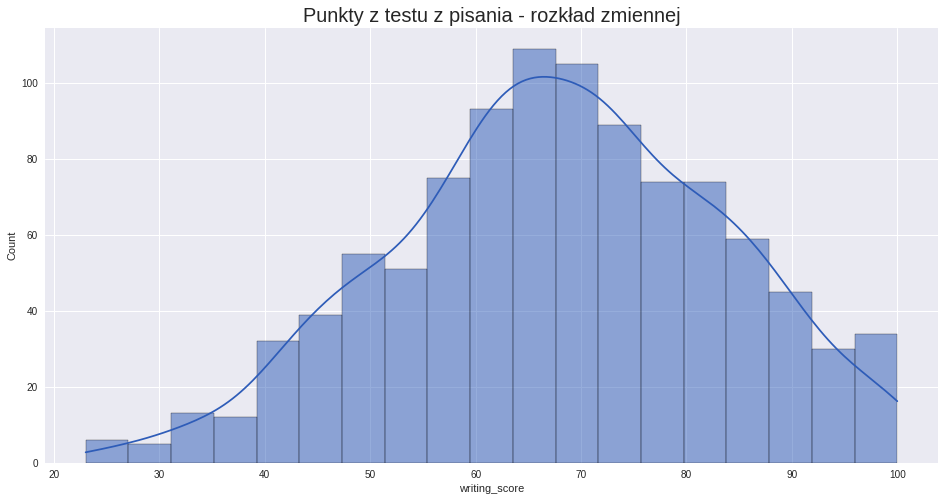

In [27]:
sns.histplot(x='writing_score',data=data_frame, kde=True, color='#2e5cb8')
plt.title('Punkty z testu z pisania - rozkład zmiennej', size=20)
plt.show()

In [28]:
data_frame['writing_score'].describe()

count    1000.000000
mean       67.738000
std        15.600985
min        23.000000
25%        58.000000
50%        68.000000
75%        79.000000
max       100.000000
Name: writing_score, dtype: float64

Ostatnia kolumna w zbiorze to kolumna zwierająca informację o ilości punktów zdobytych na teście z pisania. Rozkład zmiennej także wygląda na normalny, a średnia i mediana są blisko siebie - odpowiednio 67,7 i 68 punktów. Najniższy wynik na teście z pisania to 23 punkty, a najwyższy to 100.

### Test ANOVA dla średnich wyników z egzaminu z matematyki w poszczególnych grupach etnicznych
Aby móc wykonac test ANOVA dane muszą spełniać założenia:
1. Dane w każdej grupie powinny pochodzić z rozkładu normalnego
2. Niezależność między grupami
3. Homoskedastyczność wariancji - wariancja danych powinna być statystycznietaka sama

Drugie z założeń, które mówi o niezależności danych możemy sobie już potwierdzić - dane są od siebie niezależne każdy uczeń ma niezalezny wyniki egazminu. Teraz przejdziemy do testowania pozostałych dwóch założeń, zaczniemy od normalności danych. Na potrzeby sporządzenia testowania założeń zdecydowałam się utworzyć osobne zmienne dla każdej z grup. Grupy te będą zawierały tylko liczby punktów z egzaminu.

In [29]:
group_a = data_frame.loc[data_frame['race_ethnicity']=='group A','math_score']
group_b = data_frame.loc[data_frame['race_ethnicity']=='group B','math_score']
group_c = data_frame.loc[data_frame['race_ethnicity']=='group C','math_score']
group_d = data_frame.loc[data_frame['race_ethnicity']=='group D','math_score']
group_e = data_frame.loc[data_frame['race_ethnicity']=='group E','math_score']
group_a = group_b.reset_index()
group_b = group_b.reset_index()
group_c = group_c.reset_index()
group_d = group_d.reset_index()
group_e = group_e.reset_index()

groups = ['group_a', 'group_b', 'group_c', 'group_d', 'group_e']

Na początek zrobimy histogram dla każdej z grup, każdy z wykresów mniej lub bardziej przypomina rozkład normalny.

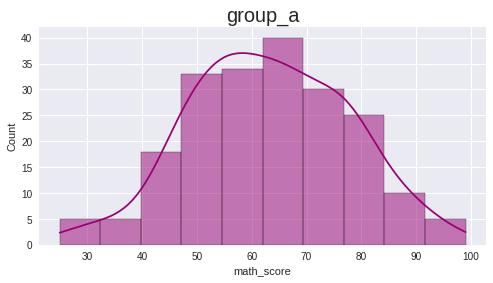

Skośność: -0.032150474820376876 Kurtoza: -0.31559550396811265
Średnia: 63.170731707317074 Mediana: 63.0


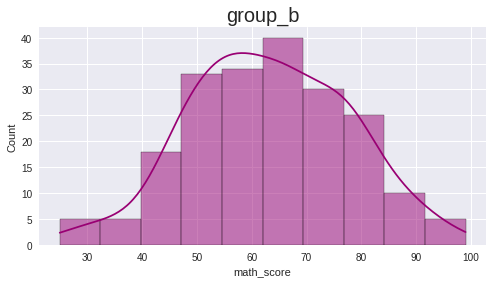

Skośność: -0.032150474820376876 Kurtoza: -0.31559550396811265
Średnia: 63.170731707317074 Mediana: 63.0


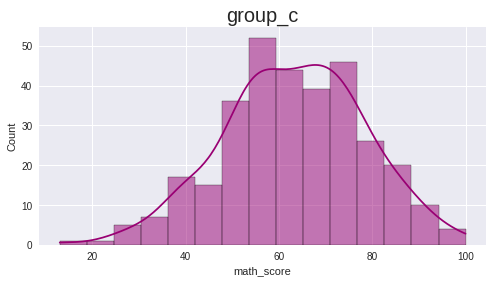

Skośność: -0.17356666446180813 Kurtoza: -0.08295101154507067
Średnia: 63.130030959752325 Mediana: 64.0


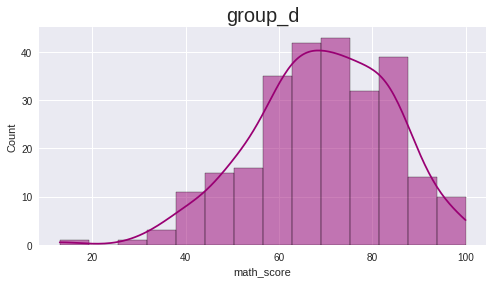

Skośność: -0.40131717462226774 Kurtoza: 0.15669266125401204
Średnia: 69.26717557251908 Mediana: 70.0


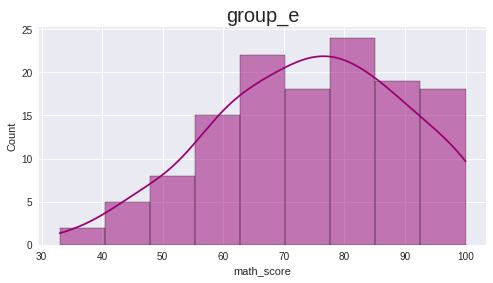

Skośność: -0.25407758871578734 Kurtoza: -0.5467399984934249
Średnia: 74.46564885496183 Mediana: 75.0


In [30]:
for group in groups:
    plt.figure(figsize=(8, 4))
    sns.histplot(x='math_score',data=eval(group), kde=True, color='#990073')
    plt.title(group, size=20)
    plt.show()
    print('Skośność:', stats.skew(eval(group)['math_score']), 'Kurtoza:', stats.kurtosis(eval(group)['math_score']))
    print('Średnia:', eval(group)['math_score'].mean(),'Mediana:',eval(group)['math_score'].median())

Sprawdzając normalność danych metodą kciuka także potwierdzają się nam dane o normalności, skośnośc i kurtoza w każdej z grup jest z przedziału (-1, 1) a mediana i średnia są blisko siebie.

Wykres QQ plot dla każdej z grup także wskazuje na normalność rzokładów zmiennych.

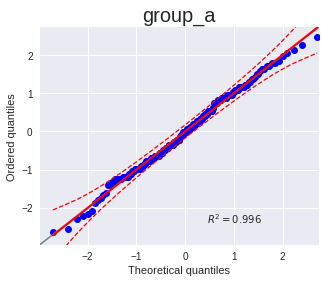

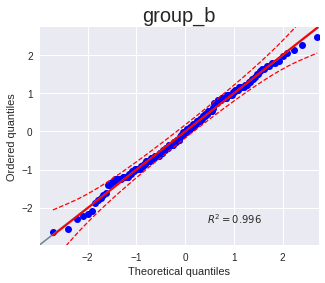

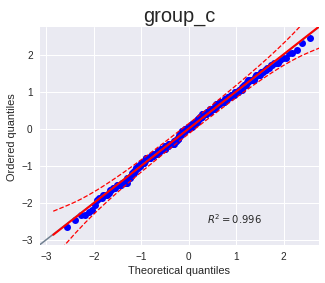

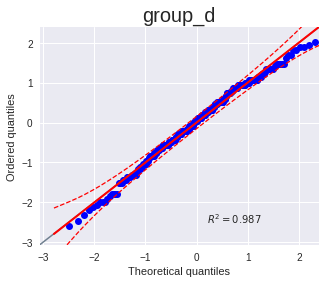

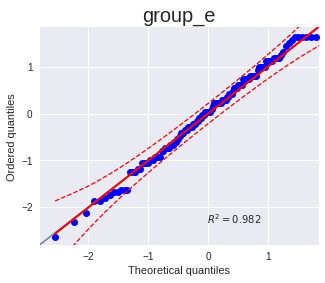

In [31]:
for group in groups:
    pg.qqplot(eval(group)['math_score'], dist='norm')
    plt.title(group, size=20)

Sprawdzając normalność danych metodą kciuka także potwierdzają się nam dane o normalności, skośnośc i kurtoza w każdej z grup jest z przedziału (-1, 1) a mediana i średnia są blisko siebie.

In [32]:
for group in groups:
    alpha = 0.05
    stat, p = stats.shapiro(eval(group)['math_score'])
    if p > alpha:
        print("Prawdopodobnie jest to rozkład normalny")
    else:
        print("Prawdopodobnie nie jest to rozkład normalny")
    print(f'{group}:', 'statystyka:', stat, 'p-value:', p)

Prawdopodobnie jest to rozkład normalny
group_a: statystyka: 0.9941601157188416 p-value: 0.6056562662124634
Prawdopodobnie jest to rozkład normalny
group_b: statystyka: 0.9941601157188416 p-value: 0.6056562662124634
Prawdopodobnie jest to rozkład normalny
group_c: statystyka: 0.9959192872047424 p-value: 0.5695543885231018
Prawdopodobnie nie jest to rozkład normalny
group_d: statystyka: 0.9869821071624756 p-value: 0.01788172498345375
Prawdopodobnie nie jest to rozkład normalny
group_e: statystyka: 0.9776349663734436 p-value: 0.029207957908511162


Na danych w grupach wykonałam jeszcze test Shapiro-Wilka, który dla 3 grup potwierdził normalność danych, a dla dwóch nie. Jednak jako, że zasada kciuka jest spełniona, oraz histogram i QQ plot wizualnie potwierdzają normalność danych przyjmę, że dane w grupach są z rozkładu normalnego.

Teraz powinniśmy przetestować ostatnie założenie testu ANOVA, które zakłada homoskedastyczność wariancji - czyli, że wariancja w grupach powinna być taka sama.

In [33]:
alpha = 0.05
stat, p = stats.bartlett(group_a['math_score'], group_b['math_score'], group_c['math_score'],
                         group_d['math_score'], group_e['math_score'])
if p > alpha:
    print('Wariancja w grupach jest taka sama', stat, p)
else:
    print('Wariancja w grupach jest taka sama', stat, p)

Wariancja w grupach jest taka sama 1.558099068187428 0.8163024999326117


Przeprowadzony test Bartletta wykazał, że wariancja w grupach jest statstycznie taka sama. 


Poniżej został zrobiony jeden wspólny wykres boxplot dla wszystkich grup, z wykresu możemy odczytać, że grupa E uzyskała najwyższe wyniki z wszystkich grup. Aby jednak sprawdzić, czy ten średnie wyniki w grupach różnią się między sobą wykonamy test ANOVA.

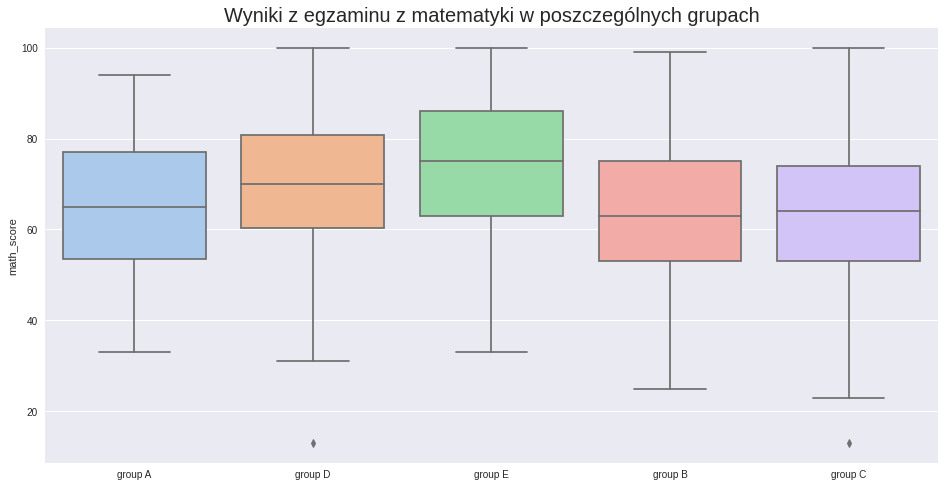

In [34]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='race_ethnicity', y='math_score', data=data_frame, palette='pastel')
plt.xlabel(None)
plt.title('Wyniki z egzaminu z matematyki w poszczególnych grupach', size=20)
plt.show()

In [35]:
alpha = 0.05
f, p = stats.f_oneway(group_a['math_score'], group_b['math_score'], group_c['math_score'],
                         group_d['math_score'], group_e['math_score'])
if p > alpha:
    print('Średnie w grupach nie różnią się między sobą')
else:
    print('Conajmniej jedna średnia jest różna')
print('stat:',f, 'p-value:',p)

Conajmniej jedna średnia jest różna
stat: 20.537093070137168 p-value: 2.393861281584345e-16


Test jednokierunkowy ANOVA wykazał, że conajmniej jedna średnia różni się statystycznie od pozostałych.

In [5]:
tukey_data = data_frame[['race_ethnicity', 'math_score']]
tukey_data

,race_ethnicity,math_score
0,group A,67
1,group D,40
2,group E,59
3,group B,77
4,group E,78
...,...,...
995,group C,73
996,group D,85
997,group C,32
998,group C,73


In [6]:

res = stat()
res.tukey_hsd(df=tukey_data, res_var='math_score', xfac_var='race_ethnicity', 
              anova_model='math_score ~ C(race_ethnicity)')
res.anova_summary

/home/sylwia/anaconda3/envs/kurs/lib/python3.9/site-packages/bioinfokit/analys.py:365: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,df,sum_sq,mean_sq,F,PR(>F)
C(race_ethnicity),4.0,16378.386008,4094.596502,18.46563,1.194293e-14
Residual,995.0,220632.797992,221.741506,NaN,NaN


In [7]:
differences_in_groups = res.tukey_summary
differences_in_groups

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,group A,group D,4.051986,-1.171277,9.275249,2.998102,0.212324
1,group A,group E,9.250459,3.453645,15.047273,6.167289,0.001000
2,group A,group B,2.044458,-3.344410,7.433327,1.466226,0.816904
3,group A,group C,2.085159,-3.022561,7.192879,1.577729,0.772209
4,group D,group E,5.198473,0.843968,9.552979,4.613785,0.010038
5,group D,group B,6.096444,2.301899,9.890989,6.209222,0.001000
6,group D,group C,6.137145,2.753732,9.520557,7.010223,0.001000
7,group E,group B,11.294917,6.743088,15.846746,9.589975,0.001000
8,group E,group C,11.335618,7.120401,15.550835,10.393114,0.001000
9,group B,group C,0.040701,-3.593155,3.674556,0.043287,0.900000


Wynik testu post-host Tukeya wskazuje, że najlepszą grupą była grupa E czyli potwierdziło się to co widac było na pierwszy rzut oka na wspólnym wykresie boxplot.
### Która z płci chętniej uczęszczała na kurs przygotowujący do testu? 
W tym celu wykorzystam niezależności chi-kwadrat.

In [55]:
contingency_table = pd.crosstab(data_frame['gender'], data_frame['test_preparation_course'])
contingency_table = contingency_table.reset_index()

In [56]:
contingency_table

test_preparation_course,gender,completed,none
0,female,160,323
1,male,175,342


Contingency table dla tych danych wykazuje, że podobna liczba uczniów męskich i żeńskich ukończyła kurs przygotowujący do testu: 160 kobiet i 175 mężczyzn. Niewiele różnią się od siebie także liczby osób, które kursu nie odbyły 323 kobiety i 342 mężczyźni.

In [57]:
observations = [[160, 323], [175, 342]]

stat, p, dof, expected = stats.chi2_contingency(observations)
  

alpha = 0.05

if p <= alpha:
    print('Zmienne są od siebie zależne')
else:
    print('Zmnienne są od siebie niezależne')
print('\n statystyka:',stat,'p-value:', p)

Zmnienne są od siebie niezależne

 statystyka: 0.03061377578898026 p-value: 0.8611048346396896


Wynik testu wskazuje, że płeć nie miała wpływu na to, czy uczniowe ukończyli kurs przygotowujący ich do testu czy też nie.

In [58]:
#Z testu zależności wyszło, że zmienne są niezależne. obliczmy Współczynnik Phi-Yul'a (tabelka 2x2)
np.sqrt(stat/(160+323+175+342))
#Korelacja znikoma ;)

0.005532971696021972

In [59]:
contingency_table = pd.crosstab(data_frame['gender'], data_frame['lunch'])
contingency_table = contingency_table.reset_index()
contingency_table

lunch,gender,free/reduced,standard
0,female,160,323
1,male,188,329


In [60]:
observations = [[160, 323], [188, 329]]

statystyka, p, dof, expected = stats.chi2_contingency(observations)
  

alpha = 0.05

if p <= alpha:
    print('Zmienne są od siebie zależne')
else:
    print('Zmnienne są od siebie niezależne')
print('\n',statystyka, p, dof, expected)

Zmnienne są od siebie niezależne

 1.0151544790177707 0.31367114418661746 1 [[168.084 314.916]
 [179.916 337.084]]


In [61]:
np.sqrt(statystyka/1000)
#wcześniej już wyszło nam, że zależności nie ma więc korealcja wychodzi znikoma :) wpsółczynnik Phi Yul'a

0.03186148896423032

Z ciekawości postanowiłam sprawdzić czy wykształcenie rodziców ma wpływ na płeć dziecka ;) Przeprowadzony test wykazał, że zmienne są od siebie zależne ale jest to zbieg okoliczności i przykład pozornej korelacji.

In [62]:
contingency_table = pd.crosstab(data_frame['gender'], data_frame['parental_education'])
contingency_table = contingency_table.reset_index()
contingency_table

parental_education,gender,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,female,81,58,94,42,100,108
1,male,122,54,108,28,122,83


In [63]:
observations = [[81, 58, 94, 42, 100, 108], [122, 54, 108, 28, 122, 83]]

stats, p, dof, expected = stats.chi2_contingency(observations)
  

alpha = 0.05

if p <= alpha:
    print('Zmienne są od siebie zależne')
else:
    print('Zmnienne są od siebie niezależne')
print('\n statystyka:',stat, 'p-value:',p)

Zmienne są od siebie zależne

 statystyka: 0.03061377578898026 p-value: 0.005530508872636054


In [64]:
# Współczynnik V-cramera
np.sqrt(stats/(1000*(2-1)))
#Zależność słaba

0.1284891387367924

### Czy wykształcenie rodziców ma wpływ na wynik testu z matematyki?
Przyjrzyjmy się ponownie wynikom z matematyki i sprawdźmy czy wykształcenie rodziców ma wpływ na ilość punktów zdobytych na teście. Wspólny wykres boxplot pokazuje, że najwyższe wyniki z testu osiągały dzieci, których rodzice posiadają wykształcenie wyższe i zdobyli tytuł licencjata bądź magistra. Najnizsze wyniki osiągnęły dzieci, których rodzice nie ukończyli szkoły średniej - czyli posiadają najniższe wykształcenie. Ale czy faktycznie jest tutaj zależność? Sprawdźmy to za pomocą testu ANOVA.

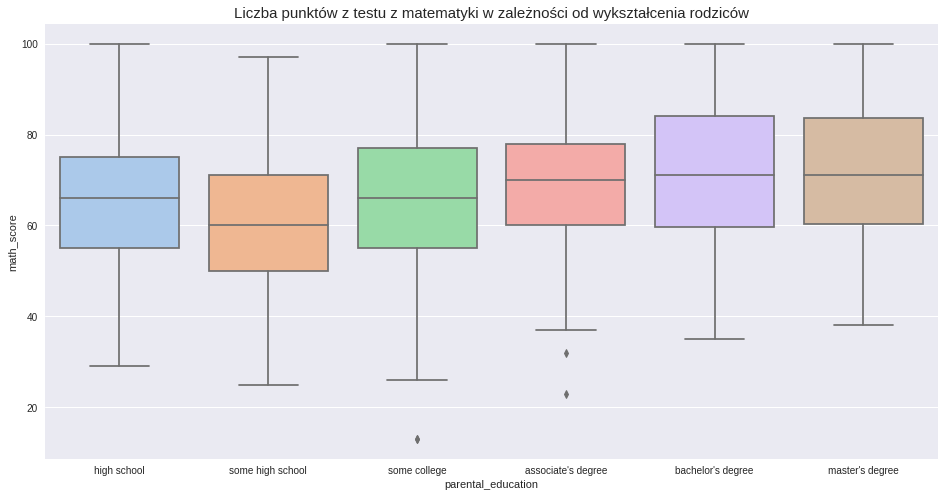

In [66]:
sns.boxplot(x='parental_education', y='math_score', data=data_frame, palette='pastel')
plt.title('Liczba punktów z testu z matematyki w zależności od wykształcenia rodziców', size=15)
plt.show()

In [69]:
model = ols('math_score ~ parental_education', data=data_frame).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
parental_education,13542.099074,5.0,12.047167,2.400332e-11
Residual,223469.084926,994.0,NaN,NaN


In [70]:
alpha = 0.05
p_value = 2.400332e-11
if p_value <= alpha:
    print('Wykształcenie rodziców ma znaczący wpływ na wyniki uzyskane w teście z matematyki')
else:
    print('Wykształcenie rodziców nie ma znaczącego wpływu na wyniki uzyskane w teście z matematyki')

Wykształcenie rodziców ma znaczący wpływ na wyniki uzyskane w teście z matematyki


Wynik testu ANOVA wykazał, że wykształcenie rodziców ma wpływ na wyniki osiąganięte przez uczniów na teście z matematyki.